In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [9]:
df=pd.read_csv("sales.csv")
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [10]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [11]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [36]:
df.dtypes

Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object

In [32]:
df.shape

(200, 5)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [13]:
dup=df.duplicated().sum()
dup

0

In [15]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [16]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


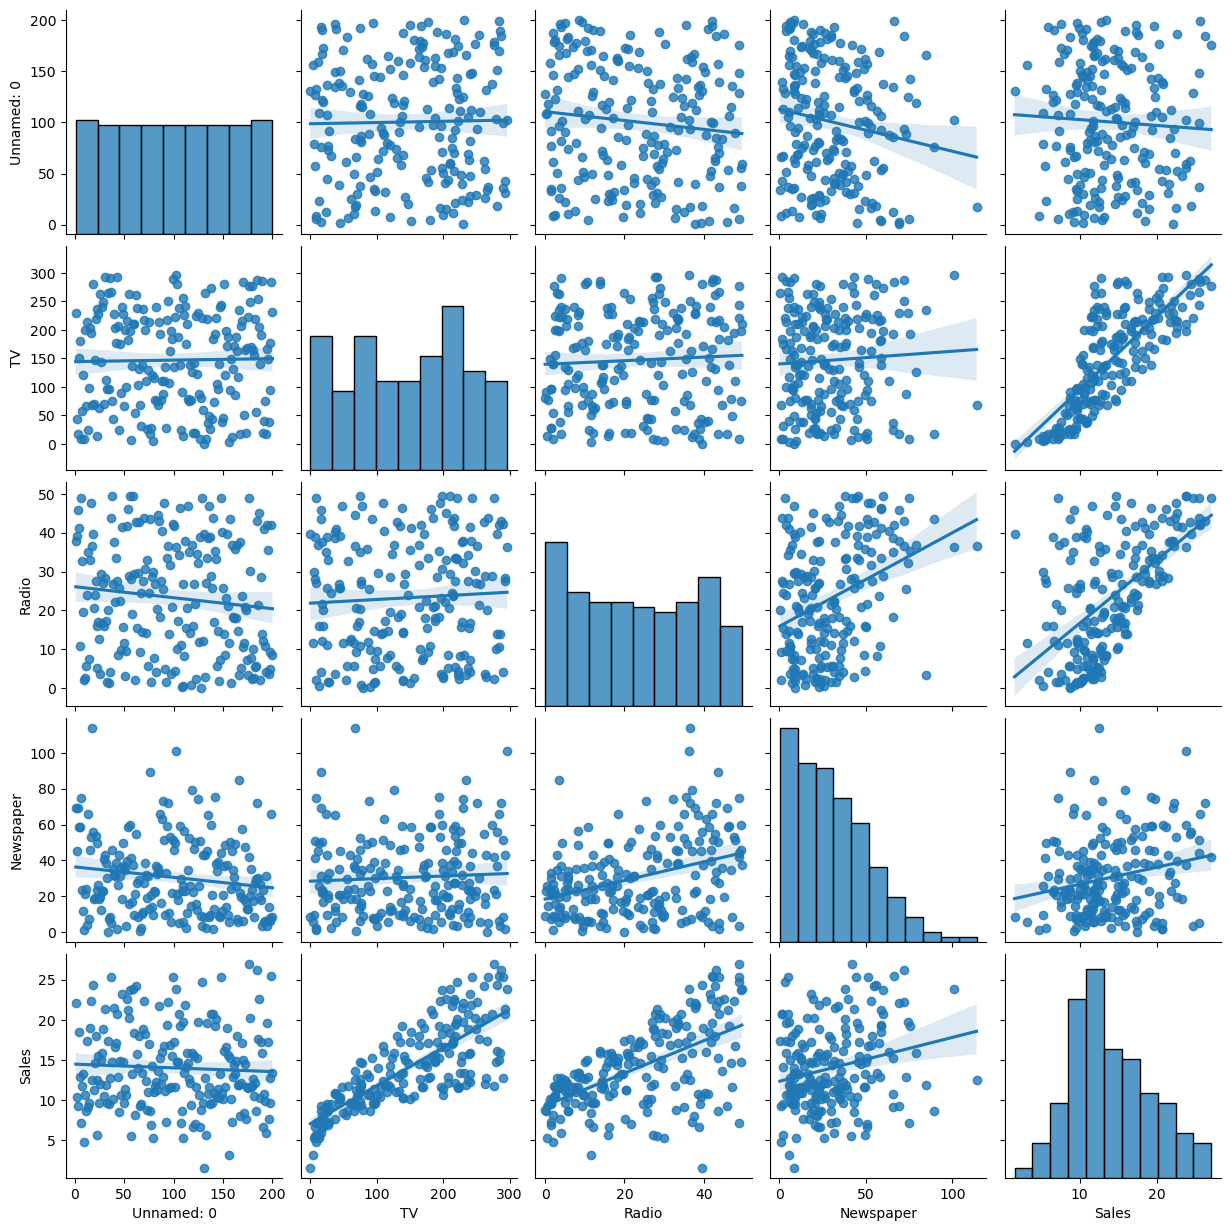

In [18]:
sns.pairplot(df,kind="reg")
plt.show()

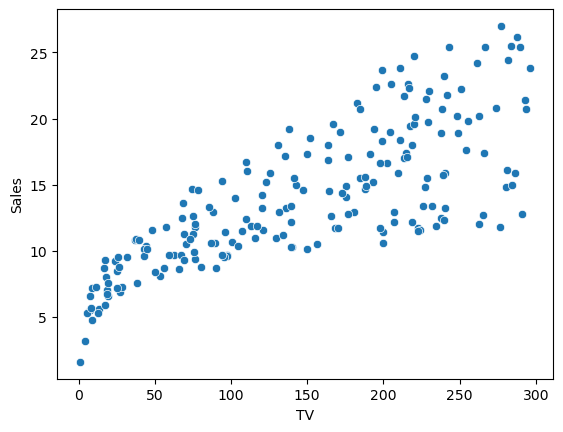

In [33]:
sns.scatterplot(x=df["TV"],y=df["Sales"])
plt.show()

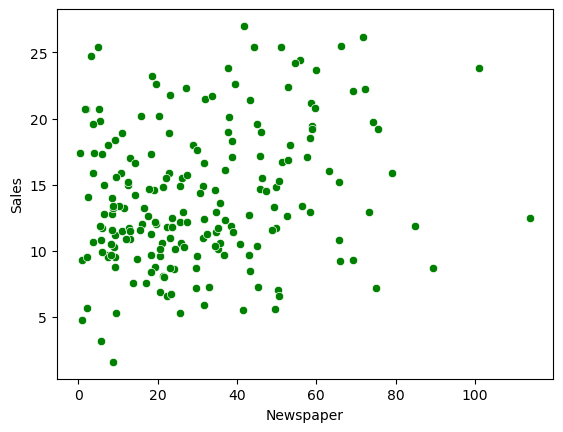

In [34]:
sns.scatterplot(x=df["Newspaper"],y=df["Sales"],color='g')
plt.show()

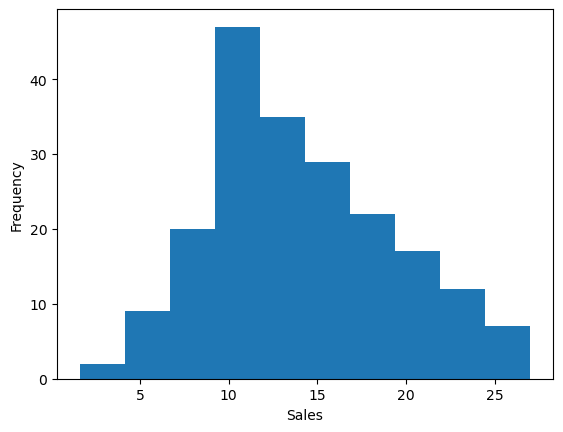

In [28]:
df["Sales"].plot.hist(bins=10,xlabel="Sales")
plt.show()

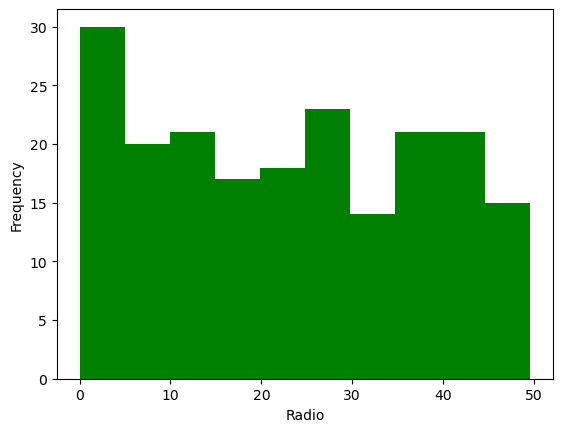

In [27]:
df["Radio"].plot.hist(bins=10,color="g",xlabel="Radio")
plt.show()

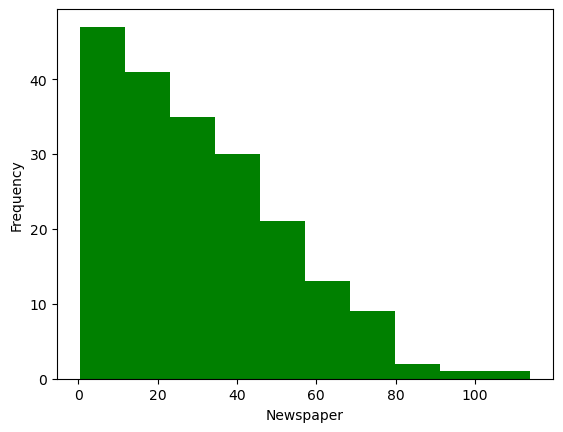

In [31]:
df["Newspaper"].plot.hist(bins=10,color="g",xlabel="Newspaper")
plt.show()

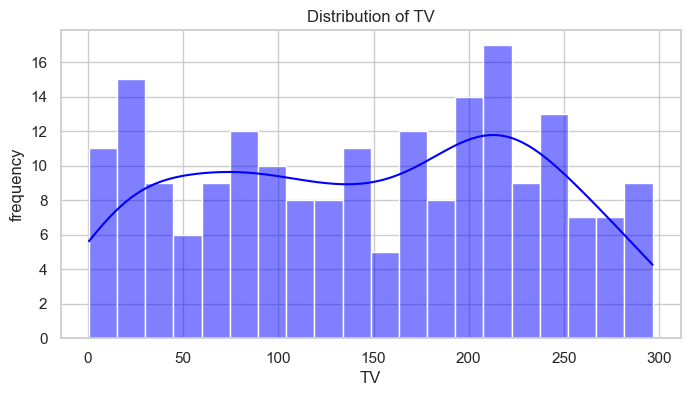

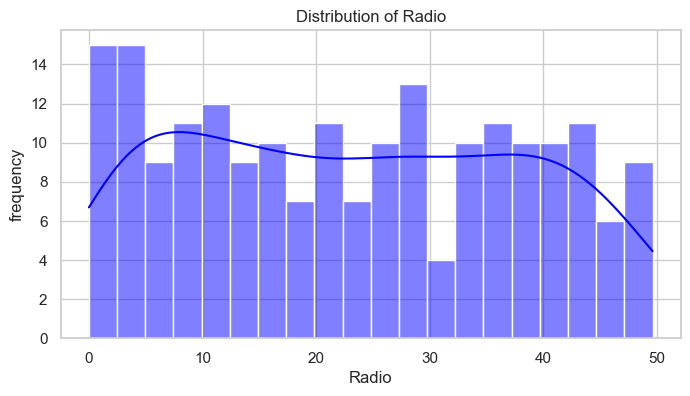

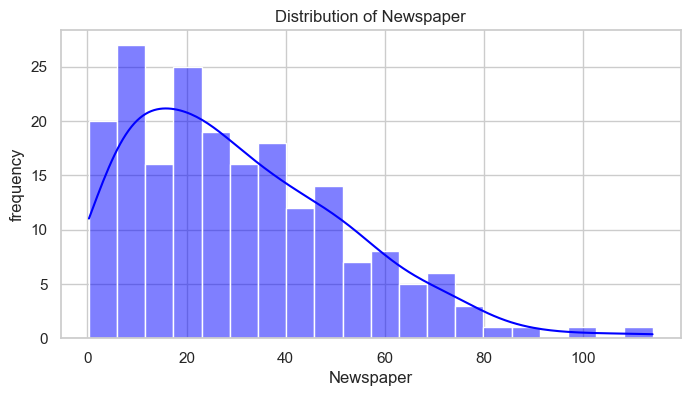

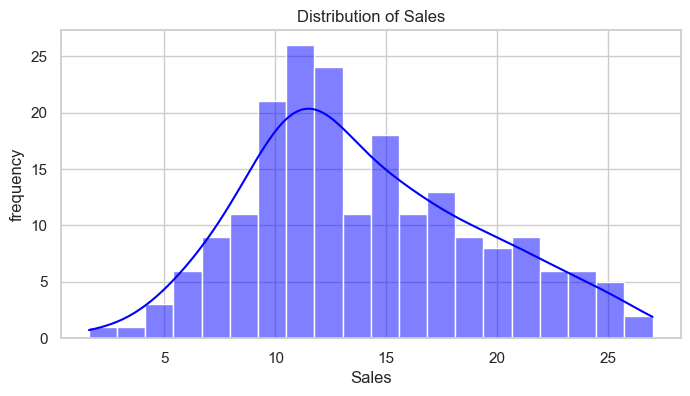

In [44]:
sns.set(style="whitegrid")
features= ["TV","Radio","Newspaper","Sales"]
for x in features:
    plt.figure(figsize = (8,4))
    plt.title(f'Distribution of {x}')
    sns.histplot(df[x], kde=True, bins= 20, color = "blue")
    plt.xlabel(x)
    plt.ylabel("frequency")
    plt.show()

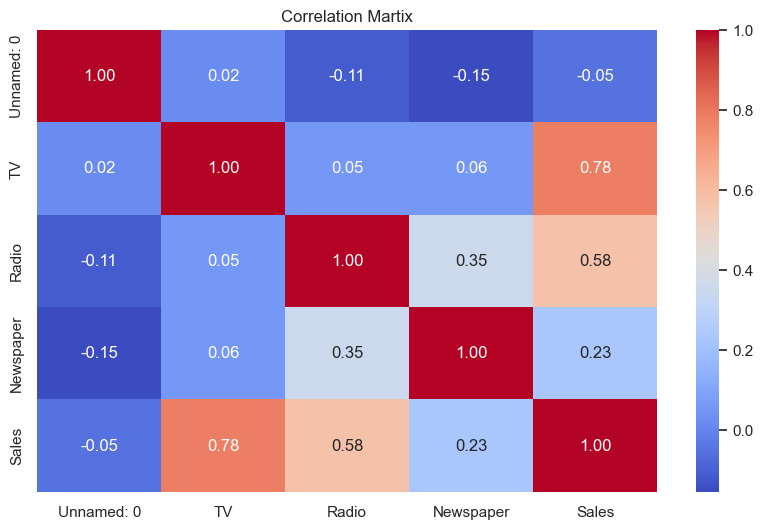

In [45]:
c_m = df.corr()
plt.figure(figsize = (10,6))
sns.heatmap(c_m, annot = True ,cmap = 'coolwarm' ,fmt ='.2f')
plt.title("Correlation Martix")
plt.show()

In [46]:
df['Total spent'] = df['TV'] + df['Newspaper'] + df['Radio'] 
df

,Unnamed: 0,TV,Radio,Newspaper,Sales,Total spent
0,1,230.1,37.8,69.2,22.1,337.1
1,2,44.5,39.3,45.1,10.4,128.9
2,3,17.2,45.9,69.3,9.3,132.4
3,4,151.5,41.3,58.5,18.5,251.3
4,5,180.8,10.8,58.4,12.9,250.0
...,...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6,55.7
196,197,94.2,4.9,8.1,9.7,107.2
197,198,177.0,9.3,6.4,12.8,192.7
198,199,283.6,42.0,66.2,25.5,391.8


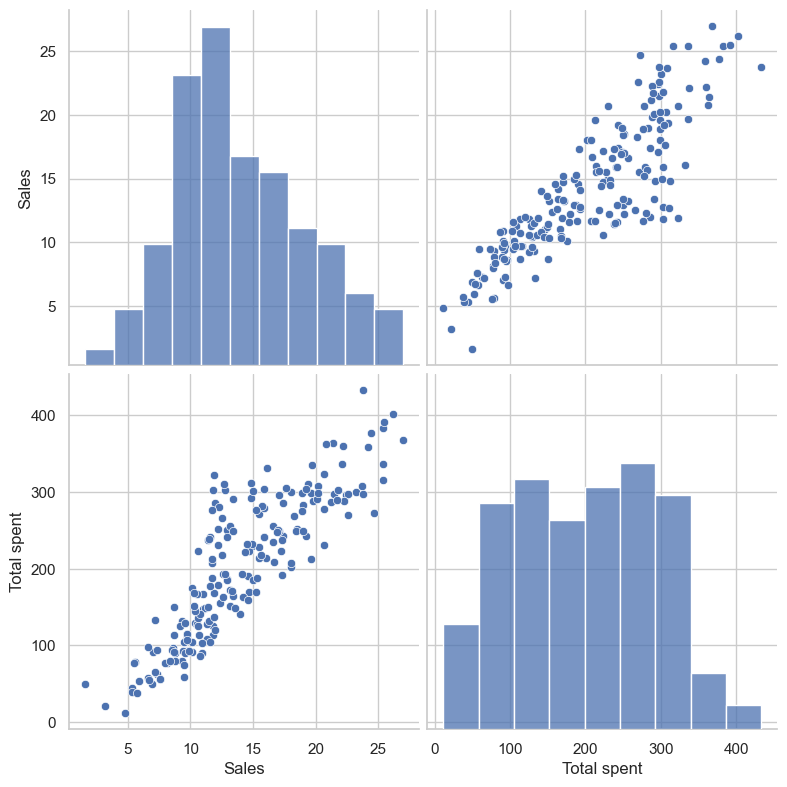

In [50]:
pairplot_data = df[["Sales","Total spent"]]
sns.set(style = 'whitegrid')
sns.pairplot(pairplot_data,height = 4)
plt.show()

In [53]:
x=df.drop(columns = 'Sales')
x

,Unnamed: 0,TV,Radio,Newspaper,Total spent
0,1,230.1,37.8,69.2,337.1
1,2,44.5,39.3,45.1,128.9
2,3,17.2,45.9,69.3,132.4
3,4,151.5,41.3,58.5,251.3
4,5,180.8,10.8,58.4,250.0
...,...,...,...,...,...
195,196,38.2,3.7,13.8,55.7
196,197,94.2,4.9,8.1,107.2
197,198,177.0,9.3,6.4,192.7
198,199,283.6,42.0,66.2,391.8


In [60]:
y=df['Sales']
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [67]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 3)

In [68]:
model=LinearRegression()

In [69]:
model.fit(x_train,y_train)

LinearRegression()

In [70]:
prediction = model.predict(x_test)
prediction


array([16.17534904,  9.56375591, 19.74193762, 12.92612872,  7.82334672,
       10.38267715, 23.6571004 ,  8.98957556, 17.58530374, 13.60765852,
       12.49252241, 14.6261671 , 15.27472426, 13.01083066, 12.51108721,
       12.08562514, 16.1901009 , 17.3868432 , 17.13506412, 21.65577869,
       18.13759983,  8.94362376, 10.71491002, 11.94123015,  6.93235654,
       13.73896088, 22.20072734, 13.51873317, 22.53882293, 11.87037526,
       17.01026976, 21.46769336, 10.79107195,  7.78191969, 10.14808103,
        8.53770328, 12.90466755, 10.75149525, 12.13600412,  9.89325673,
       15.52839572, 13.06934618,  5.90581927, 20.51508522, 22.43741466,
       24.4563312 , 14.40363967, 10.98858335, 16.27610986, 18.19560275,
       11.36555873, 14.7248132 , 16.94652365,  9.02139638, 19.51529967,
       10.93959132, 22.66535067, 21.11049966, 15.77468857, 14.93574682])

In [73]:
model.intercept_

3.4175655796755464

In [74]:
model.coef_

array([ 0.00101876, -0.01359129,  0.13172862, -0.06166565,  0.05647168])

In [76]:
model.score(x_test,y_test)

0.8748762638758796